# Data Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [2]:
wine=pd.read_csv('wineQualityReds.csv')


In [4]:
del(wine['Unnamed: 0'])

In [5]:
wine.shape

(1599, 12)

In [6]:
wine.head(8)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7


In [7]:
# Helps in displaying max number of columns and rows 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Feature Bands

In [8]:
features=[i for i in wine.columns if i!='quality']

In [9]:
features

['fixed.acidity',
 'volatile.acidity',
 'citric.acid',
 'residual.sugar',
 'chlorides',
 'free.sulfur.dioxide',
 'total.sulfur.dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

As we can see  there are eleven features in dataset.Next we will make bands of features for further feature creation. What we are going to do is discretize variable into equal-sized buckets based on rank or based on sample quantiles. For example 1000 values for 10 quantiles would produce a Categorical object indicating quantile membership for each data point.

In [10]:
bins={}
for i in features:
    wine[i+'_band'],bins[i]=pd.qcut(wine[i],10,labels=False,retbins=True)

Below are the quartiles in which our data is divided

In [11]:
bins

{'alcohol': array([ 8.4,  9.3,  9.5,  9.6,  9.9, 10.2, 10.5, 10.9, 11.3, 12. , 14.9]),
 'chlorides': array([0.012, 0.06 , 0.067, 0.072, 0.076, 0.079, 0.082, 0.087, 0.094,
        0.109, 0.611]),
 'citric.acid': array([0.   , 0.01 , 0.07 , 0.124, 0.21 , 0.26 , 0.32 , 0.39 , 0.46 ,
        0.522, 1.   ]),
 'density': array([0.99007 , 0.994556, 0.99534 , 0.99586 , 0.9963  , 0.99675 ,
        0.997156, 0.9976  , 0.998174, 0.99914 , 1.00369 ]),
 'fixed.acidity': array([ 4.6,  6.5,  7. ,  7.2,  7.6,  7.9,  8.3,  8.9,  9.7, 10.7, 15.9]),
 'free.sulfur.dioxide': array([ 1.,  5.,  6.,  9., 11., 14., 16., 19., 24., 31., 72.]),
 'pH': array([2.74 , 3.12 , 3.18 , 3.23 , 3.28 , 3.31 , 3.35 , 3.38 , 3.424,
        3.51 , 4.01 ]),
 'residual.sugar': array([ 0.9,  1.7,  1.8,  2. ,  2.1,  2.2,  2.3,  2.5,  2.7,  3.6, 15.5]),
 'sulphates': array([0.33 , 0.5  , 0.54 , 0.564, 0.59 , 0.62 , 0.65 , 0.7  , 0.76 ,
        0.85 , 2.   ]),
 'total.sulfur.dioxide': array([  6. ,  14. ,  19. ,  24. ,  30. ,  38. 

In [12]:
#Saving the data with bands in a csv file
wine.to_csv('wine_with_bands.csv',index=False)

In [13]:
wine.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,fixed.acidity_band,volatile.acidity_band,citric.acid_band,residual.sugar_band,chlorides_band,free.sulfur.dioxide_band,total.sulfur.dioxide_band,density_band,pH_band,sulphates_band,alcohol_band
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,3,8,0,2,3,3,4,7,8,2,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,4,9,0,7,8,8,7,5,2,6,3
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,4,9,1,5,7,5,6,5,3,5,3
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,9,0,9,2,3,6,7,7,1,3,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,3,8,0,2,3,3,4,7,8,2,1


In [14]:
wine.shape


(1599, 23)

# Exploratory Data Analysis

Now we will do exploratory data analysis of different variables .First we will go for univariate analysis.

## Univariate Analysis

In [15]:
sns.set_palette(sns.light_palette("navy", reverse=True))

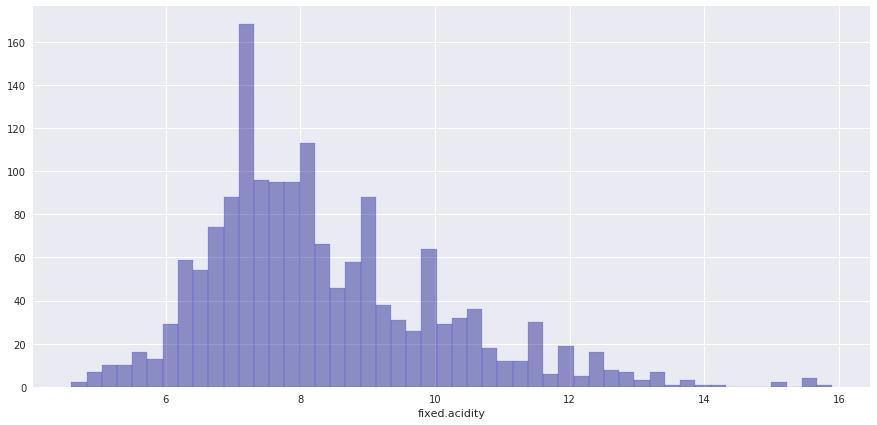

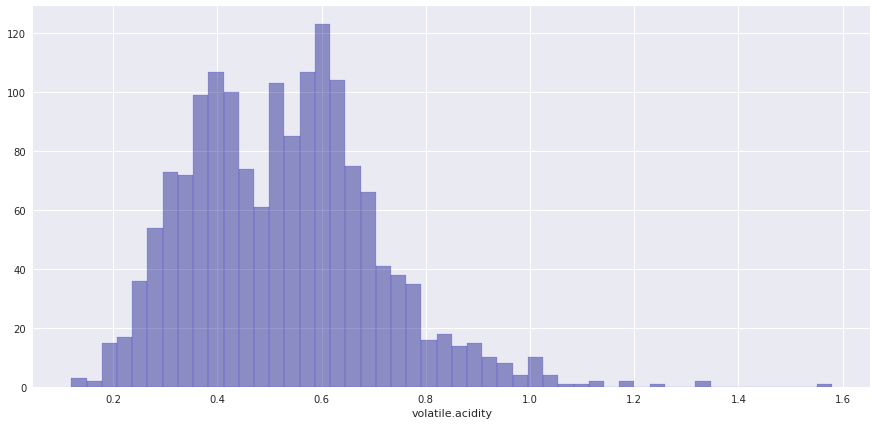

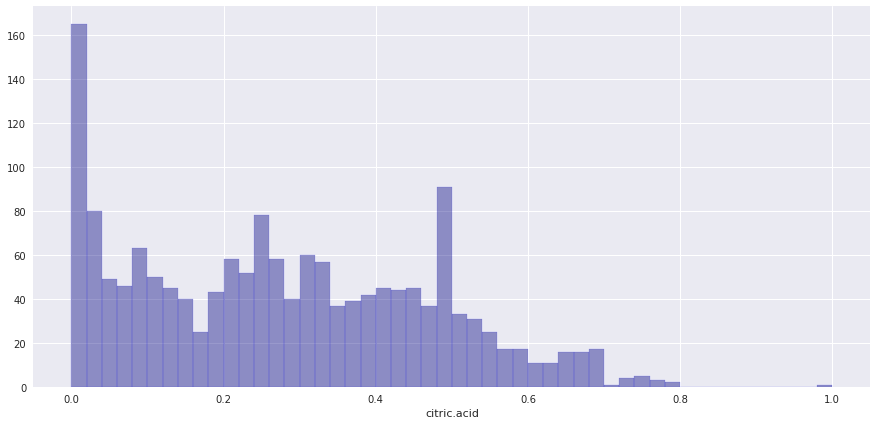

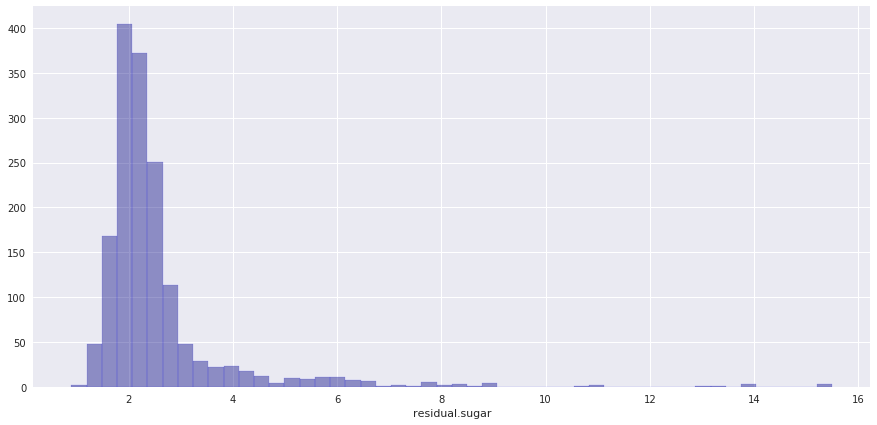

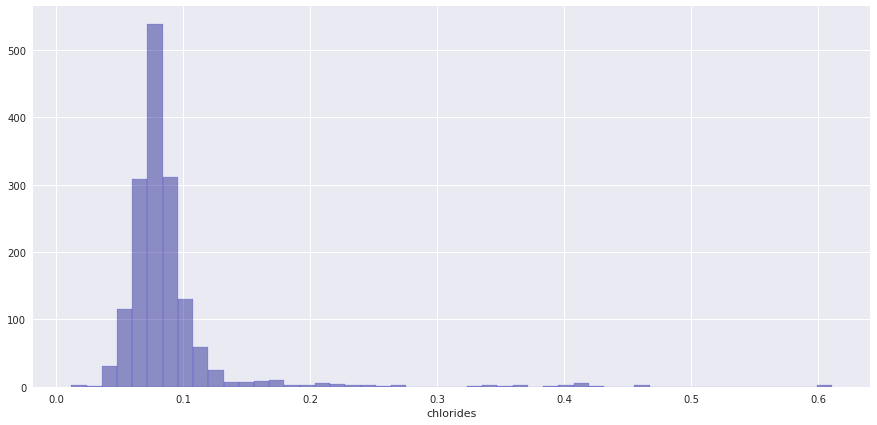

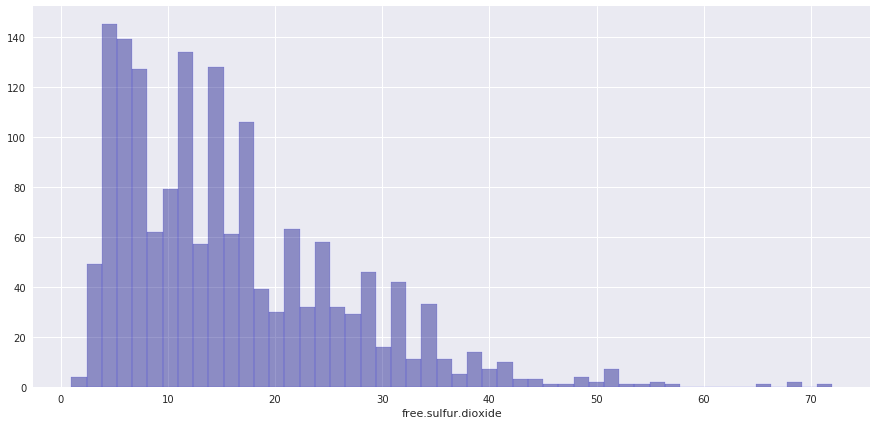

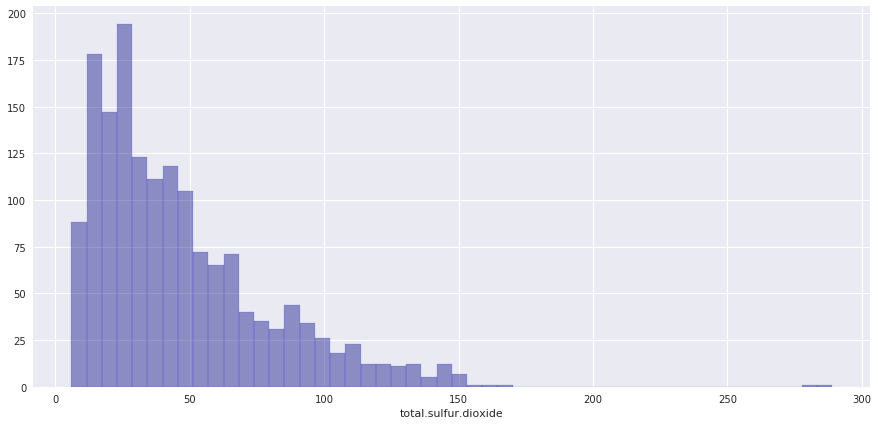

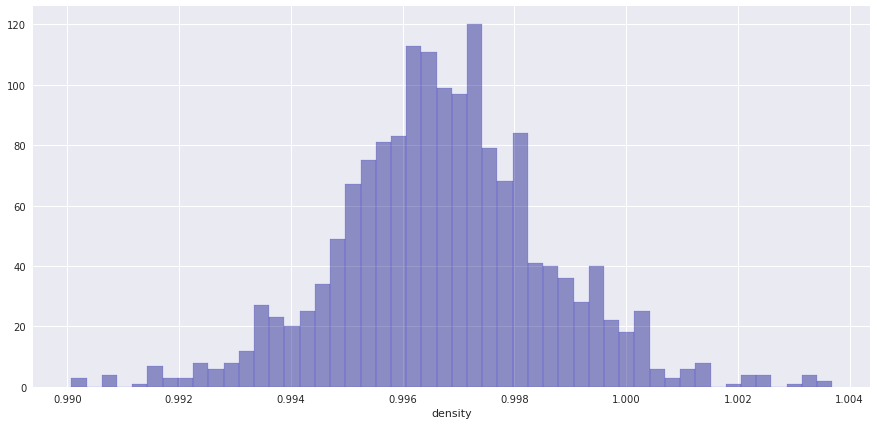

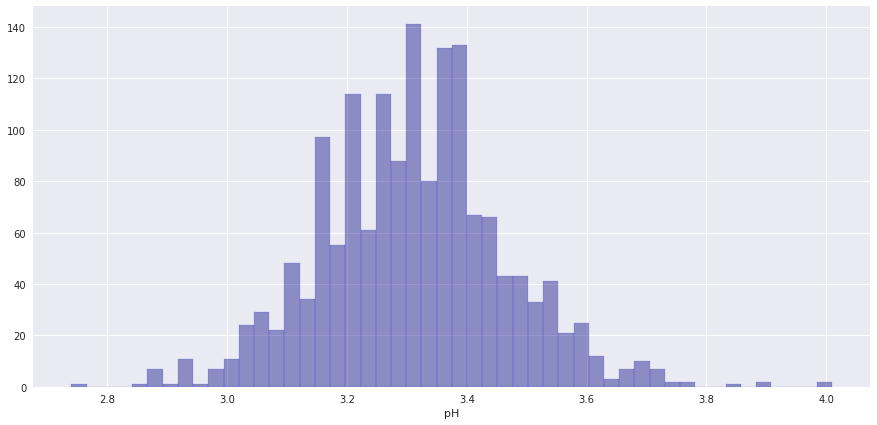

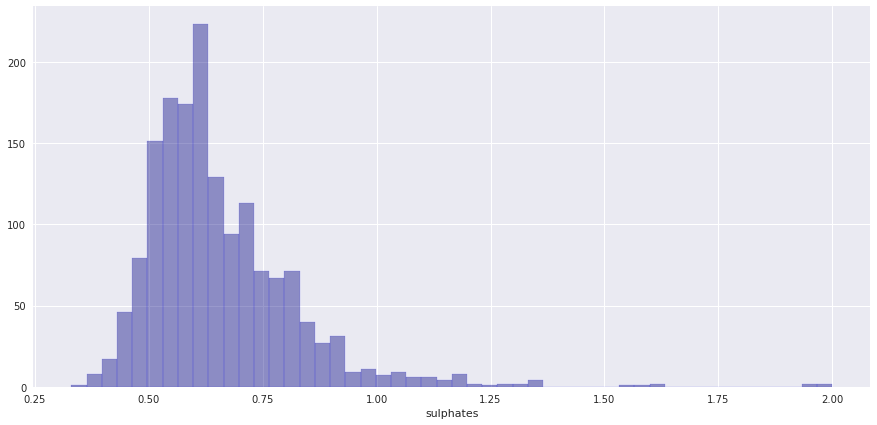

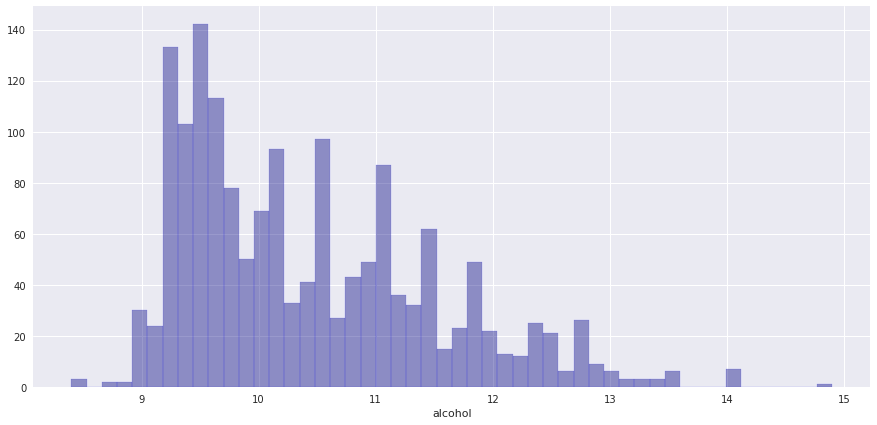

In [16]:
for i in features:    
    plt.figure(figsize=(15,7))

    ax=sns.distplot(wine[i],hist=True,bins=50,kde=False,hist_kws={'edgecolor':'blue'})

    plt.show()

From above plots ,we can say that only alcohol,citric acid and fixed acidity are distributed to a wide range. Rest all of the features are concentrated to a limited range 

## Target Plots

In [17]:
sns.set_palette(sns.light_palette("navy", reverse=True),6)

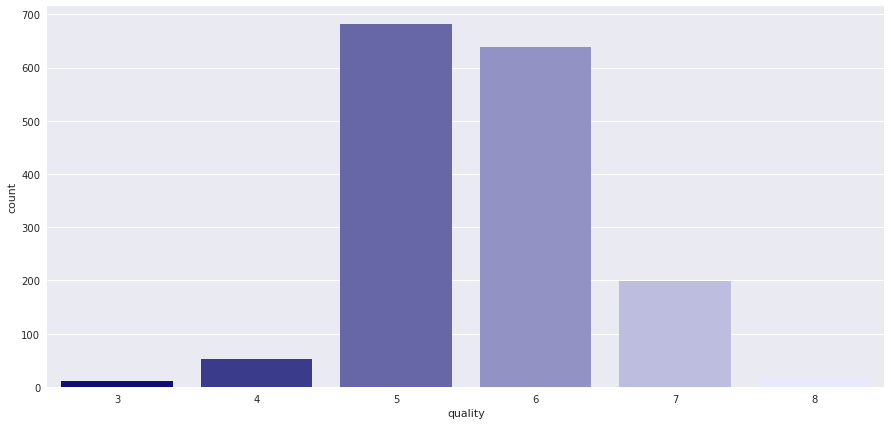

In [18]:
plt.figure(figsize=(15,7))

ax=sns.countplot(x=wine['quality'],data=wine)


plt.show()

As we can see, there are six categories of quality of wine.However if we see the count plots only the quality of 5 and 6 are high in number. Hence we formulate the problem to from multiclass to 2 classes only ,considering good and bad wine only. Since the data points are less in number,this approcah can help us to reach higher accuracy along with good precision and recall values, hence more stable model.

In [19]:

mask=((wine['quality']<=5))
wine.loc[mask,'badtag']=1
wine.loc[~mask,'badtag']=0


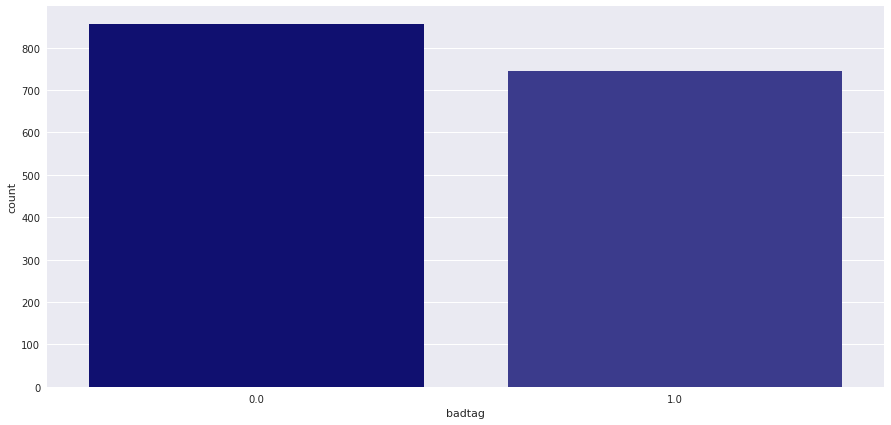

In [20]:
plt.figure(figsize=(15,7))

ax=sns.countplot(x=wine['badtag'],data=wine)


plt.show()

Now we got a good distribution of good and bad wine. Hence we can now explore the data ,so as how the features are affecting target variable (now badtag) 

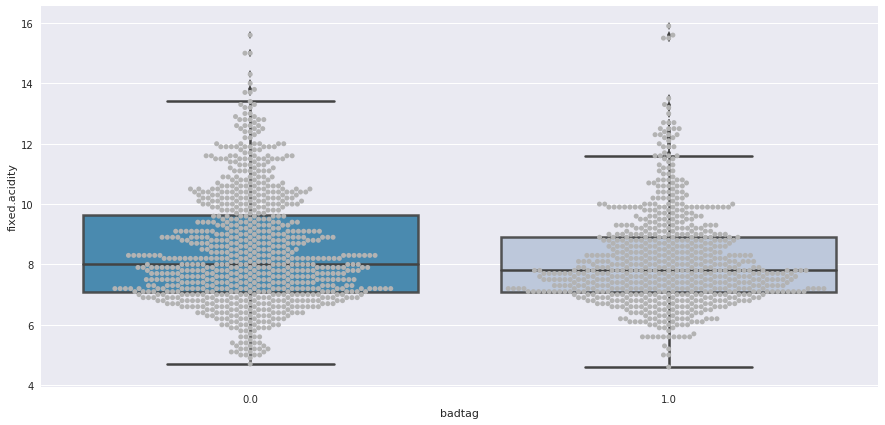

In [21]:

plt.figure(figsize=(15,7))
sns.set_palette(sns.color_palette('PuBu_r',2))
ax = sns.boxplot(x="badtag", y='fixed.acidity', data=wine,boxprops=dict(alpha=.9),linewidth=2.5)

ax = sns.swarmplot(x='badtag', y='fixed.acidity', data=wine,color='0.7')
plt.show()

    

The high quality wine(0.0) has slightly higher fixed acidity than low quality ones as the median is 8 in boxplots for 0.0 and less than 8 for 1.0

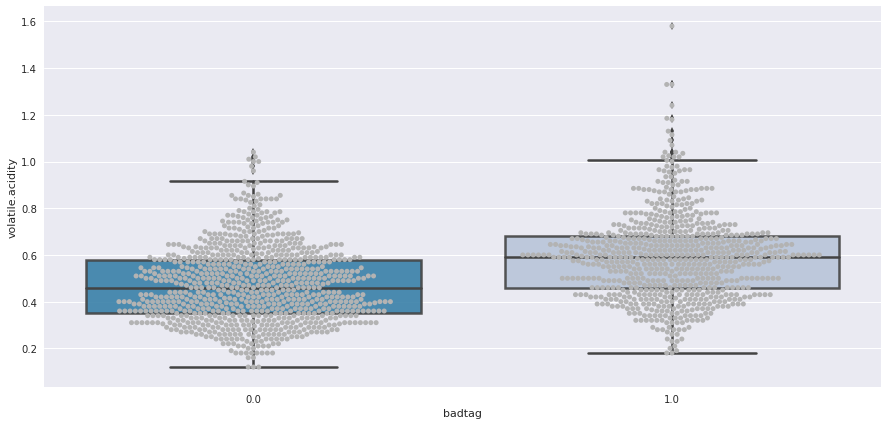

In [22]:

plt.figure(figsize=(15,7))
sns.set_palette(sns.color_palette('PuBu_r',2))
ax = sns.boxplot(x="badtag", y='volatile.acidity', data=wine,boxprops=dict(alpha=.9),linewidth=2.5)

ax = sns.swarmplot(x='badtag', y='volatile.acidity', data=wine,color='0.7')
plt.show()


Here in this boxplot, it is clearly visible that volatile acidity is more for bad quality wine(1.0).The median falls below 0.5 for bad quality wine and 0.6 for good quality wine

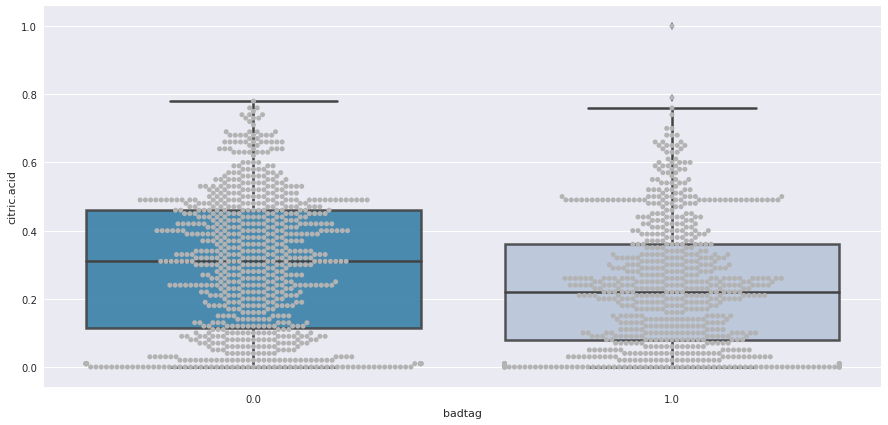

In [23]:

plt.figure(figsize=(15,7))
sns.set_palette(sns.color_palette('PuBu_r',2))
ax = sns.boxplot(x="badtag", y='citric.acid', data=wine,boxprops=dict(alpha=.9),linewidth=2.5)

ax = sns.swarmplot(x='badtag', y='citric.acid', data=wine,color='0.7')
plt.show()

The levels of citric acid is also different for good and bad wine This means this could be a good variable in predicting the quality of wine

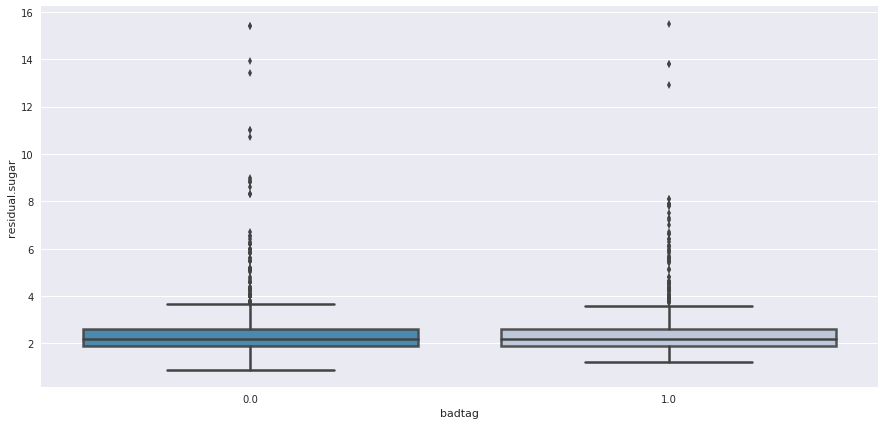

In [28]:

plt.figure(figsize=(15,7))
sns.set_palette(sns.color_palette('PuBu_r',2))
ax = sns.boxplot(x="badtag", y='residual.sugar', data=wine,boxprops=dict(alpha=.9),linewidth=2.5)

#ax = sns.swarmplot(x='badtag', y='residual.sugar', data=wine,color='0.7')
plt.show()

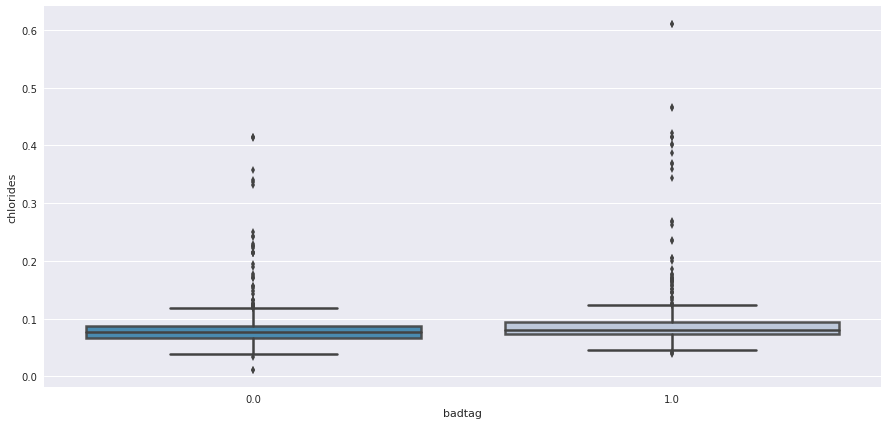

In [29]:

plt.figure(figsize=(15,7))
sns.set_palette(sns.color_palette('PuBu_r',2))
ax = sns.boxplot(x="badtag", y='chlorides', data=wine,boxprops=dict(alpha=.9),linewidth=2.5)

#ax = sns.swarmplot(x='badtag', y='chlorides', data=wine,color='0.7')
plt.show()

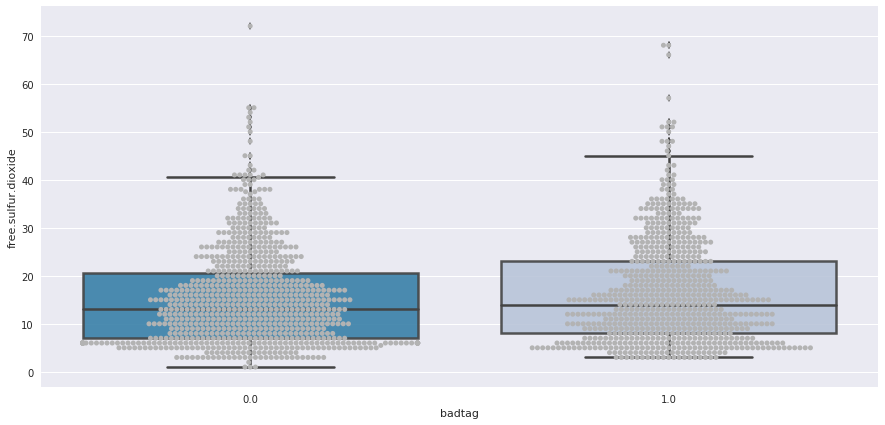

In [26]:

plt.figure(figsize=(15,7))
sns.set_palette(sns.color_palette('PuBu_r',2))
ax = sns.boxplot(x="badtag", y='free.sulfur.dioxide', data=wine,boxprops=dict(alpha=.9),linewidth=2.5)

ax = sns.swarmplot(x='badtag', y='free.sulfur.dioxide', data=wine,color='0.7')
plt.show()

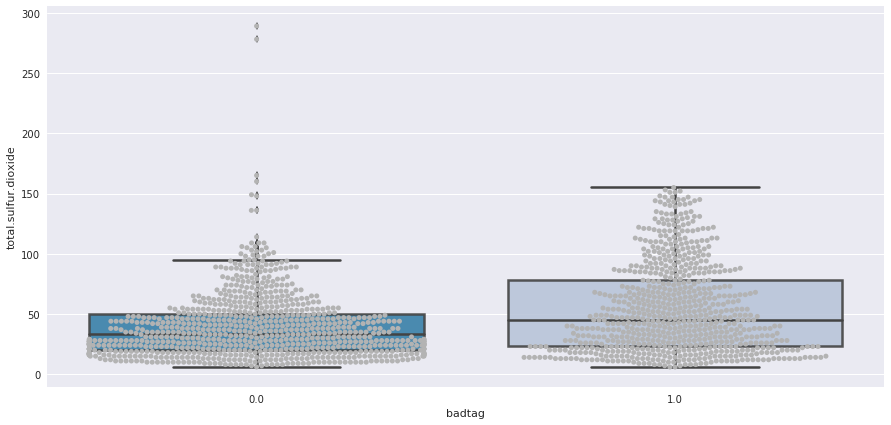

In [30]:

plt.figure(figsize=(15,7))
sns.set_palette(sns.color_palette('PuBu_r',2))
ax = sns.boxplot(x="badtag", y='total.sulfur.dioxide', data=wine,boxprops=dict(alpha=.9),linewidth=2.5)

ax = sns.swarmplot(x='badtag', y='total.sulfur.dioxide', data=wine,color='0.7')
plt.show()

Total sulphur dioxide is also a distinguishing feature in quality of wine as we can see from the above box plot

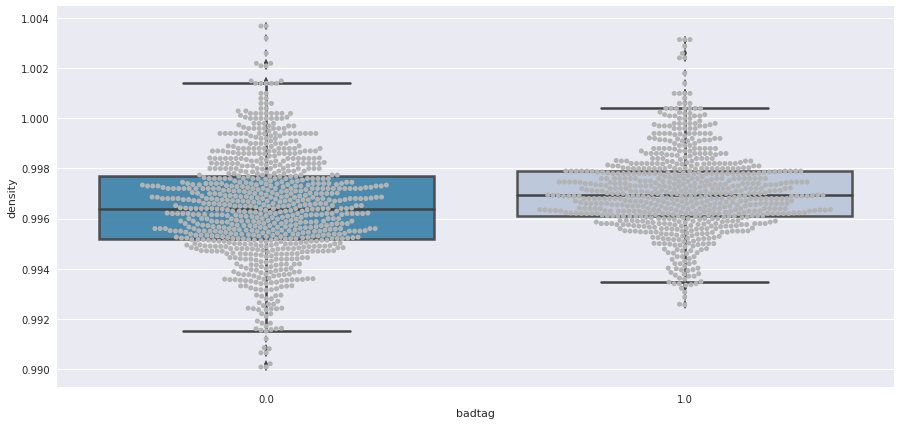

In [31]:

plt.figure(figsize=(15,7))
sns.set_palette(sns.color_palette('PuBu_r',2))
ax = sns.boxplot(x="badtag", y='density', data=wine,boxprops=dict(alpha=.9),linewidth=2.5)

ax = sns.swarmplot(x='badtag', y='density', data=wine,color='0.7')
plt.show()

This boxplot shows the difference in densities of good and bad wine

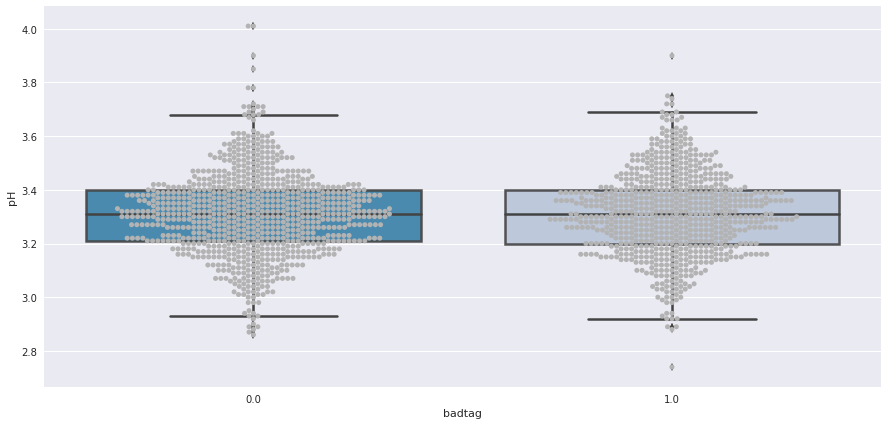

In [32]:

plt.figure(figsize=(15,7))
sns.set_palette(sns.color_palette('PuBu_r',2))
ax = sns.boxplot(x="badtag", y='pH', data=wine,boxprops=dict(alpha=.9),linewidth=2.5)

ax = sns.swarmplot(x='badtag', y='pH', data=wine,color='0.7')
plt.show()

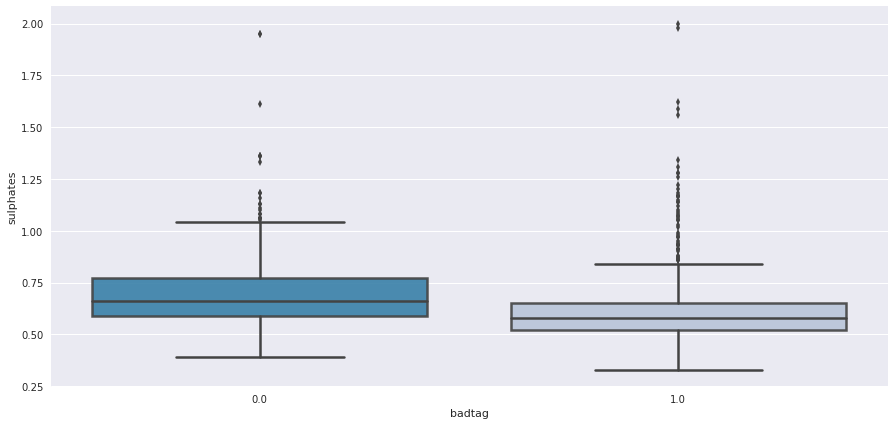

In [39]:

plt.figure(figsize=(15,7))
sns.set_palette(sns.color_palette('PuBu_r',2))
ax = sns.boxplot(x="badtag", y='sulphates', data=wine,boxprops=dict(alpha=.9),linewidth=2.5)

#ax = sns.swarmplot(x='badtag', y='sulphates', data=wine,color='0.7')
plt.show()

Less sulphates in wine infer bad quality wine. Sulphates can be used as a good feature for wine quality

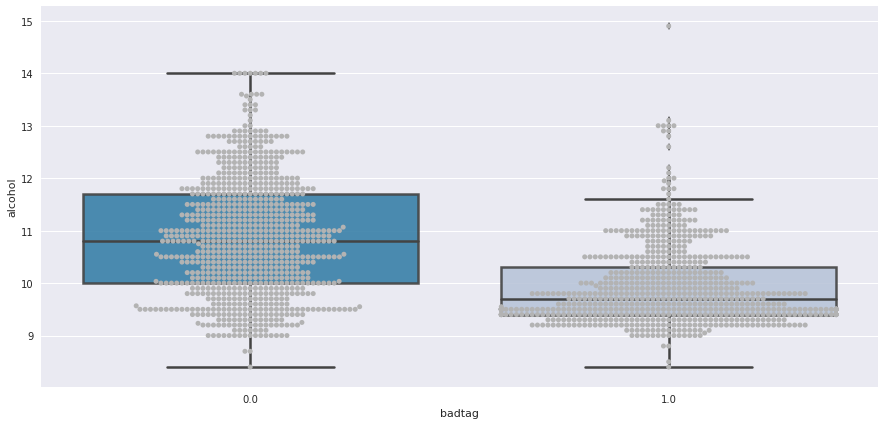

In [34]:

plt.figure(figsize=(15,7))
sns.set_palette(sns.color_palette('PuBu_r',2))
ax = sns.boxplot(x="badtag", y='alcohol', data=wine,boxprops=dict(alpha=.9),linewidth=2.5)

ax = sns.swarmplot(x='badtag', y='alcohol', data=wine,color='0.7')
plt.show()

There is significant difference between the level of alcohol in good quality and bad quality wine.Hence it is also a determining feature for quality of wine

In [35]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [36]:
wine['badtag'].value_counts()

0.0    855
1.0    744
Name: badtag, dtype: int64

In [37]:
wine.to_csv('wine_with_bands.csv',index=False)

In [38]:
wine.head(20)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,fixed.acidity_band,volatile.acidity_band,citric.acid_band,residual.sugar_band,chlorides_band,free.sulfur.dioxide_band,total.sulfur.dioxide_band,density_band,pH_band,sulphates_band,alcohol_band,badtag
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,3,8,0,2,3,3,4,7,8,2,1,1.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,4,9,0,7,8,8,7,5,2,6,3,1.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,4,9,1,5,7,5,6,5,3,5,3,1.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,9,0,9,2,3,6,7,7,1,3,3,0.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,3,8,0,2,3,3,4,7,8,2,1,1.0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,3,7,0,1,3,4,5,7,8,2,1,1.0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,4,6,1,0,2,5,7,4,4,0,1,1.0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,3,7,0,0,1,5,2,1,7,0,4,0.0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,4,6,1,2,3,2,1,5,6,3,1,0.0
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,3,4,6,9,2,6,9,7,5,8,5,1.0
